In [1]:
#import the necessary libraries
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
#import the necessary libraries
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt

SPOTIPY_CLIENT_ID = "4989571fddd74e60ab2a52e2244b70f3"
SPOTIPY_CLIENT_SECRET = "83bbadbcc14545f6a8bf1438f9d67b5a"

# Set up authentication
#Logs into Spotify’s API using your credentials.
#Enables API requests to fetch song data.

client_credentials_manager = SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID,
                                                      client_secret=SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [20]:


artist_name = []
track_name = []
popularity = []
track_id = []
images = []

for i in range(0, 1000, 50):
    track_results = sp.search(q='year:2023', type='track', limit=50, offset=i)
    for t in track_results['tracks']['items']:
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        popularity.append(t['popularity'])
        images.append(t['album']['images'][0]['url'])

In [28]:
track_dataframe = pd.DataFrame({
    'Artist': artist_name,
    'Track': track_name,
    'Track ID': track_id,
    'Popularity': popularity,
    'Image URL': images
})

# Sort by popularity (descending)
df_sorted = track_dataframe.sort_values(by='Popularity', ascending=False).reset_index(drop=True)

# Display the first 10 most popular tracks
df_sorted.head(10)

,Artist,Track,Track ID,Popularity,Image URL
0,The Weeknd,"One Of The Girls (with JENNIE, Lily Rose Depp)",7CyPwkp0oE8Ro9Dd5CUDjW,90,https://i.scdn.co/image/ab67616d0000b273b0dd6a...
1,Teddy Swims,Lose Control,17phhZDn6oGtzMe56NuWvj,89,https://i.scdn.co/image/ab67616d0000b2731a0323...
2,Feid,LUNA,7bywjHOc0wSjGGbj04XbVi,87,https://i.scdn.co/image/ab67616d0000b273f1aad8...
3,Don Toliver,No Pole,0eaVIYo2zeOaGJeqZ5TwYz,87,https://i.scdn.co/image/ab67616d0000b273f5e27c...
4,Mitski,My Love Mine All Mine,3vkCueOmm7xQDoJ17W1Pm3,86,https://i.scdn.co/image/ab67616d0000b27334f21d...
5,Miley Cyrus,Flowers,7DSAEUvxU8FajXtRloy8M0,86,https://i.scdn.co/image/ab67616d0000b273cd2220...
6,Chezile,Beanie,5e0b9LgOfi3aJSKXFcOWRe,86,https://i.scdn.co/image/ab67616d0000b273c16d7b...
7,The Kid LAROI,NIGHTS LIKE THIS,1XBYiRV30ykHw5f4wm6qEn,86,https://i.scdn.co/image/ab67616d0000b2732abb30...
8,Teddy Swims,The Door,3dj4wgM3cPeuLwMNHDuBon,86,https://i.scdn.co/image/ab67616d0000b2731a0323...
9,Travis Scott,FE!N (feat. Playboi Carti),42VsgItocQwOQC3XWZ8JNA,86,https://i.scdn.co/image/ab67616d0000b273881d8d...


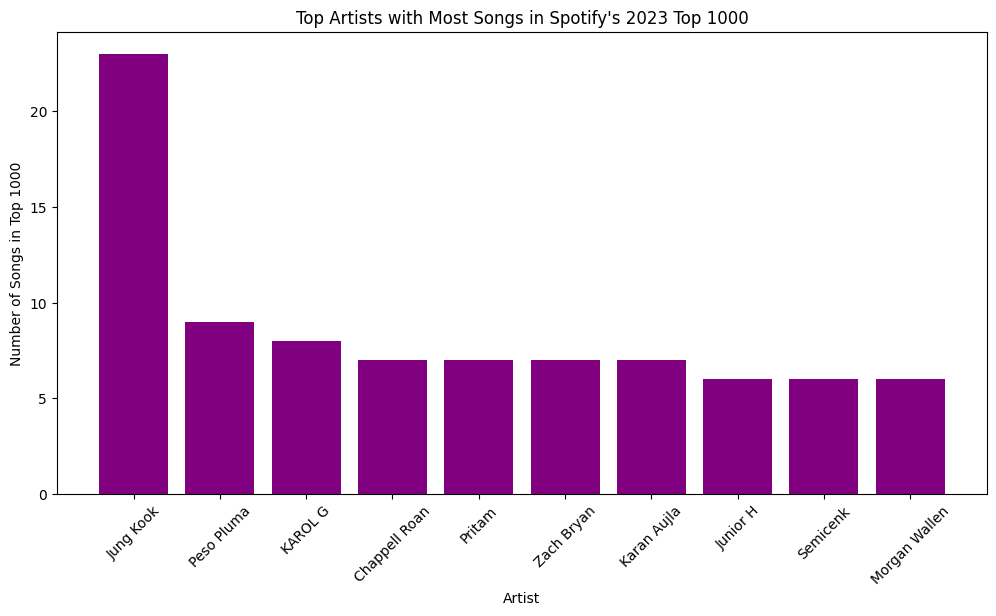

In [26]:
artist_counts = track_dataframe['Artist'].value_counts()
most_successful_artists = artist_counts.head(10)

# Plot the results
plt.figure(figsize=(12,6))
plt.bar(most_successful_artists.index, most_successful_artists.values, color='purple')
plt.xlabel("Artist")
plt.ylabel("Number of Songs in Top 1000")
plt.title("Top Artists with Most Songs in Spotify's 2023 Top 1000")
plt.xticks(rotation=45)
plt.show()

In [ ]:
client_credentials_manager = SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID,
                                                      client_secret=SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

most_popular_track = df_sorted.iloc[0]
most_popular_track_id = most_popular_track['Track ID']

# Get audio features
track_audio_features = sp.audio_features(most_popular_track_id)[0]

# Print key details
print(f"Danceability: {track_audio_features['danceability']}")
print(f"Energy: {track_audio_features['energy']}")
print(f"Speechiness: {track_audio_features['speechiness']}")
print(f"Valence (Mood): {track_audio_features['valence']}")

In [ ]:

#example code from spotipy to get all albums of artist birdy

birdy_uri = 'spotify:artist:2WX2uTcsvV5OnS0inACecP'


results = sp.artist_albums(birdy_uri, album_type='album')
albums = results['items']
while results['next']:
    results = sp.next(results)
    albums.extend(results['items'])

for album in albums:
    print(album['name'])

Portraits (+ Remixes)
Portraits
Young Heart
Beautiful Lies (Deluxe)
Beautiful Lies
Fire Within (Deluxe)
Fire Within
Fire Within
Live in London
Birdy


In [ ]:
#example code from spotipy to get all albums of artist piri and tommy

#put the end of the artist url on their spotify webpage to get their artist ID, this is for piri and tommy

pt_uri = 'spotify:artist:2U6J9Q89i1TNhesKreFD65'         

results = sp.artist_albums(pt_uri, album_type='album')
albums = results['items']
while results['next']:
    results = sp.next(results)
    albums.extend(results['items'])

for album in albums:
    print(album['name'])

froge.mp3


In [ ]:
#example code from spotipy to get all albums of Red Hot Chili Peppers


RHCP_uri = 'spotify:artist:0L8ExT028jH3ddEcZwqJJ5'         

results = sp.artist_albums(RHCP_uri, album_type='album')
albums = results['items']
while results['next']:
    results = sp.next(results)
    albums.extend(results['items'])

for album in albums:
    print(album['name'])

Return of the Dream Canteen
Unlimited Love
The Getaway
I'm with You
Stadium Arcadium
By the Way (Deluxe Edition)
By the Way
Californication (Deluxe Edition)
Californication
One Hot Minute (Deluxe Edition)
One Hot Minute
Blood Sugar Sex Magik (Deluxe Edition)
Mother's Milk
The Uplift Mofo Party Plan
Freaky Styley
Red Hot Chili Peppers
